# 5. States (Logic Programming) 

**States** adalah salah satu bentuk penerapan dari Logic Programming, dimana dalam kasus ini digunakan data tentang negara bagian yang saling bersebelahan dan negara bagian yang ada di pesisir pantai Amerika Serikat.<br>

Logic Programming sendiri adalah sebuah pemrograman dimana komputasi yang dilakukan terjadi secara otomatis didasarkan pada database yang memuat fakta dan aturan tertentu. Logic Programming menggunakan metode pencocokan variabel dengan item yang berbeda berdasarkan fakta dan aturan tertentu yang sudah didefinisikan sebelumnya, proses ini dinamakan dengan unifikasi. Hubungan antar variabel dinamakan sebagai relasi, jika semua relasinya sesuai dengan aturan dan fakta, maka relasinya dinyatakan dengan benar.

In [1]:
from logpy import run, fact, eq, Relation, var

* **logpy** adalah library yang digunakan untuk melakukan pemrograman logic dan relasional pada python. 
* Pada listing diatas juga terdapat beberapa fungsi seperti run, fact, eq, Relation dan var yang digunakan untuk melakukan operasi logic dan relasional.

In [2]:
adjacent = Relation()
coastal = Relation()

* Listing diatas mendefinisikan function **Relation()** pada variabel **adjacent** dan **coastal**. 
* Function ini akan digunakan untuk melihat relasi antar kedua variabel tersebut.

In [3]:
file_coastal = 'coastal_states.txt'
file_adjacent = 'adjacent_states.txt'

* Data **file_coastal** didefinisikan dari **coastal_states.txt** dan **adjacent** didefinisikan dari **adjacent_states.text**.
* Kedua data inilah yang akan dicari hubungan relasinya berdasarkan aturan dan fakta yang terdapat pada data tersebut.

In [4]:
# Read the file containing the coastal states
with open(file_coastal, 'r') as f:
    line = f.read()
    coastal_states = line.split(',')

* Data negara bagian yang merupakan **pesisir(coastal)** dibaca, untuk mendapatkan data, aturan dan fakta yang ada didalamnya.

In [5]:
# Add the info to the fact base
for state in coastal_states:
    fact(coastal, state)

* Data **coastal_state** yang telah dibaca tadi, kemudian dimasukan kedalam kumpulan fakta. Menggunakan perulangan untuk mendapatkan nilai dari setiap indexnya.

In [6]:
# Read the file containing the coastal states
with open(file_adjacent, 'r') as f:
    adjlist = [line.strip().split(',') for line in f if line and line[0].isalpha()]

* Data negara bagian yang saling **berdekatan(adjacent)** dibaca, untuk mendapatkan data, aturan dan fakta yang ada didalamnya.

In [7]:
# Add the info to the fact base
for L in adjlist:
    head, tail = L[0], L[1:]
    for state in tail:
        fact(adjacent, head, state)

* Data **adjlist** yang telah dibaca tadi, kemudian dimasukan kedalam kumpulan fakta. Menggunakan perulangan untuk mendapatkan nilai dari setiap indexnya.

In [8]:
# Initialize the variables
x = var()
y = var()

* Variabel **x** dan **y** didefinisikan sebagai variabel kosong untuk menampung inputan dan keluaran

### Dibawah Ini adalah percobaan yang dilakukan untuk mengukur Logic Programming berdasarkan Fakta yang ada.

Terdapat beberapa inputan pertanyaan yang akan dijawab menggunakan Logic Programming ini. Berikut dilampirkan foto negara bagian di Amerika Serikat untuk mempermudah analisanya.

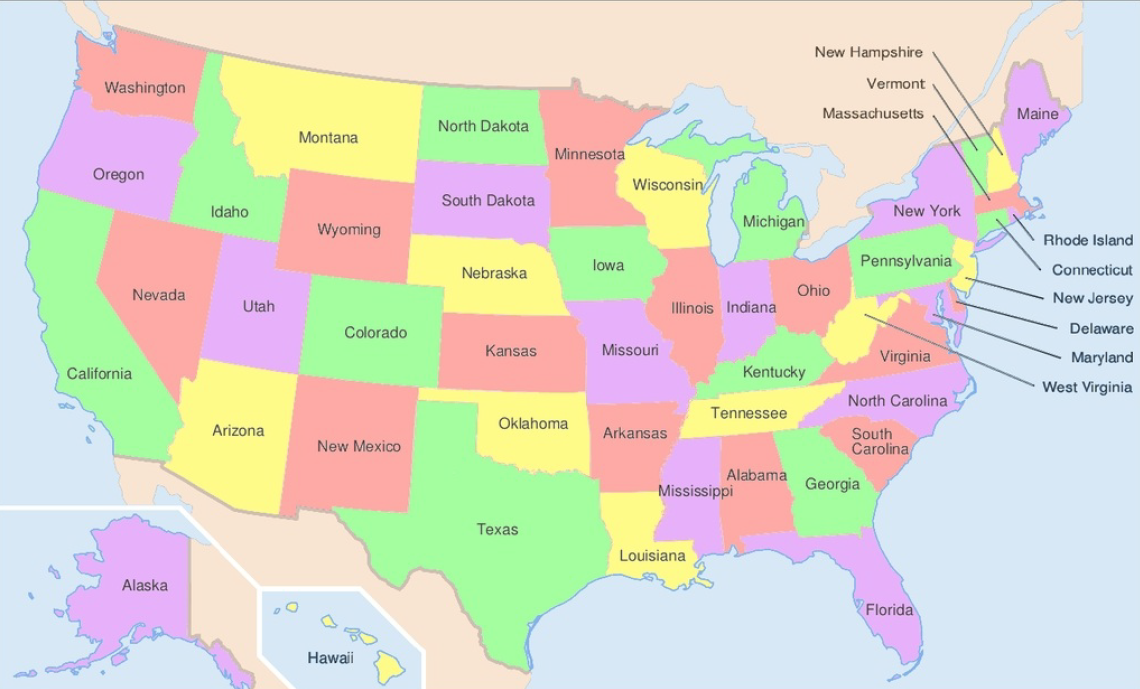

In [9]:
# Is Nevada adjacent to Louisiana?
output = run(0, x, adjacent('Nevada', 'Louisiana'))
print('\nIs Nevada adjacent to Louisiana?:')
print('Yes' if len(output) else 'No')


Is Nevada adjacent to Louisiana?:
No


* Dalam percobaan ini dilakukan pembuktian algoritma Logic Programming untuk mententukan **Apakah Nevada berdekatan dengan Louisiana?**<br>Jawabannya adalah **tidak**, hal ini dapat dibuktikan di peta.

In [10]:
# States adjacent to Oregon
output = run(0, x, adjacent('Oregon', x))
print('\nList of states adjacent to Oregon:')
for item in output:
    print(item)


List of states adjacent to Oregon:
Nevada
Idaho
California
Washington


In [11]:
# States adjacent to Mississippi that are coastal
output = run(0, x, adjacent('Mississippi', x), coastal(x))
print('\nList of coastal states adjacent to Mississippi:')
for item in output:
    print(item)


List of coastal states adjacent to Mississippi:
Alabama
Louisiana


In [12]:
# List of 'n' states that border a coastal state
n = 7
output = run(n, x, coastal(y), adjacent(x, y))
print('\nList of ' + str(n) + ' states that border a coastal state:')
for item in output:
    print(item)


List of 7 states that border a coastal state:
Wisconsin
New York
Vermont
Georgia
Washington
Oklahoma
Connecticut


In [13]:
# List of states that adjacent to the two given states
output = run(0, x, adjacent('Arkansas', x), adjacent('Kentucky', x))
print('\nList of states that are adjacent to Arkansas and Kentucky:')
for item in output:
    print(item)


List of states that are adjacent to Arkansas and Kentucky:
Tennessee
Missouri


Berdasarkan keseluruhan percobaan yang telah dilakukan, terbukti bahwa Logic Programming menghasilkan sebuah output berdasarkan fakta dan aturannya. Jika sebuah data saling berelasi karena fakta dan aturan terpenuhi, maka data tersebut diambil dan digunakan sebagai output.